In [ ]:
!pip install pandas scikit-learn keras matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
url = "WineQT.csv"
wine_data = pd.read_csv(url, delimiter=";")

# Display the first few rows
print(wine_data.head())


  fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0  7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0....                                                                                                  
1  7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0....                                                                                                  
2  7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0...                                                                                                  
3  11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,...                                                                                                  
4  7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0....                                                                                                  


In [ ]:
# Separate the features (X) and target (y)
X = wine_data.drop(columns=['quality', 'Id'])  # Drop 'quality' and 'Id'
y = wine_data['quality']  # 'quality' is the target variable


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
url = "WineQT.csv"
wine_data = pd.read_csv(url)  # Assuming the delimiter is ','

# Display the first few rows to check column names
print(wine_data.head())

# Check if 'quality' and 'Id' are in the column names
print(wine_data.columns)

# Separate the features (X) and target (y)
# Use actual column names from wine_data.columns if they differ
# Replace 'quality' and 'Id' with the correct column names if needed
X = wine_data.drop(columns=['quality', 'Id'], errors='ignore')
# Drop 'quality' and 'Id' if present, ignore if not
y = wine_data['quality']  # 'quality' is the target variable

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [ ]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Instantiate and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
# Predict the wine quality on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model using MSE and R² score
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R² Score: {r2_dt}")


Decision Tree MSE: 0.6244541484716157
Decision Tree R² Score: -0.12216434788568242


In [ ]:
# Build the Neural Network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer
nn_model.add(Dense(32, activation='relu'))  # Hidden layer
nn_model.add(Dense(1))  # Output layer for regression

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the Neural Network model
history = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 29.1786 - mae: 5.3335 - val_loss: 16.7468 - val_mae: 3.9536
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.4304 - mae: 3.4916 - val_loss: 5.3936 - val_mae: 1.9869
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6076 - mae: 1.7394 - val_loss: 3.5396 - val_mae: 1.4082
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6547 - mae: 1.2487 - val_loss: 2.5948 - val_mae: 1.2586
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0118 - mae: 1.0969 - val_loss: 2.3060 - val_mae: 1.1912
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8698 - mae: 1.0650 - val_loss: 2.0930 - val_mae: 1.1370
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5929 - mae: 0.9949 - val_loss: 1.9313 - val_mae: 1.0941
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4878 - mae: 0.9606 - val_loss: 1.8056 - val_mae: 1.0561
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.

In [ ]:
# Predict the wine quality on test data
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate the model using MSE and R² score
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network MSE: {mse_nn}")
print(f"Neural Network R² Score: {r2_nn}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Neural Network MSE: 0.37079264404606543
Neural Network R² Score: 0.3336736559867859


In [ ]:
# Print the results of the comparison
print("Comparison of Models:")
print(f"Decision Tree MSE: {mse_dt}, R²: {r2_dt}")
print(f"Neural Network MSE: {mse_nn}, R²: {r2_nn}")


Comparison of Models:
Decision Tree MSE: 0.6244541484716157, R²: -0.12216434788568242
Neural Network MSE: 0.37079264404606543, R²: 0.3336736559867859


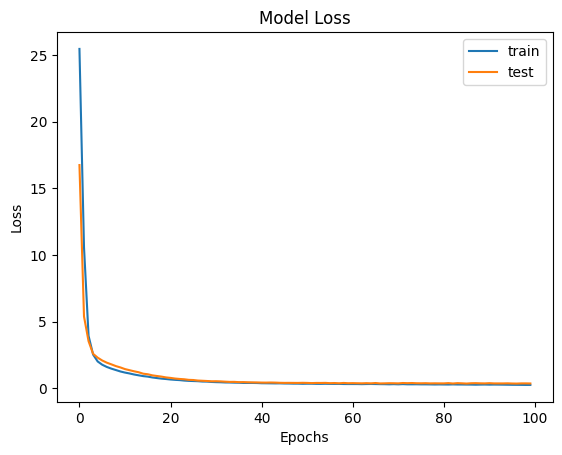

In [ ]:
# Plotting the training and validation loss over epochs for Neural Network
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Convert wine quality to binary labels (good or bad)
y_binary = y.apply(lambda x: 1 if x >= 6 else 0)

# Split the dataset into training and test sets for binary classification
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


In [ ]:
# Scale the features for Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict the binary class labels (good/bad wine)
y_pred_dt = dt_model.predict(X_test)

# Evaluate using accuracy, precision, recall, and F1-score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Decision Tree Precision: {precision_dt}")
print(f"Decision Tree Recall: {recall_dt}")
print(f"Decision Tree F1 Score: {f1_dt}")


Decision Tree Accuracy: 0.6812227074235808
Decision Tree Precision: 0.7142857142857143
Decision Tree Recall: 0.7086614173228346
Decision Tree F1 Score: 0.7114624505928854


In [ ]:
# # Build the Neural Network model for binary classification
# nn_model = Sequential()
# nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer
# nn_model.add(Dense(32, activation='relu'))  # Hidden layer
# nn_model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# # Compile the model (binary cross-entropy loss function for binary classification)
# nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the Neural Network model
# history = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Predict the binary class labels (good/bad wine) with the trained model
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate using accuracy, precision, recall, and F1-score
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print(f"Neural Network Accuracy: {accuracy_nn}")
print(f"Neural Network Precision: {precision_nn}")
print(f"Neural Network Recall: {recall_nn}")
print(f"Neural Network F1 Score: {f1_nn}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Neural Network Accuracy: 0.5545851528384279
Neural Network Precision: 0.5545851528384279
Neural Network Recall: 1.0
Neural Network F1 Score: 0.7134831460674157


In [ ]:
# Assuming wine_data is your DataFrame
num_samples, num_features = wine_data.shape

# Print the results
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

Number of samples: 1143
Number of features: 13


In [ ]:
# Basic summary statistics for all numerical columns
summary_stats = wine_data.describe()  # Includes count, mean, std, min, 25%, 50% (median), 75%, max

# Adding the median separately (since it's not included in .describe())
summary_stats.loc['median'] = wine_data.median()

# Display the statistics
print(summary_stats)

        fixed acidity  volatile acidity  citric acid  residual sugar  \
count     1143.000000       1143.000000  1143.000000     1143.000000   
mean         8.311111          0.531339     0.268364        2.532152   
std          1.747595          0.179633     0.196686        1.355917   
min          4.600000          0.120000     0.000000        0.900000   
25%          7.100000          0.392500     0.090000        1.900000   
50%          7.900000          0.520000     0.250000        2.200000   
75%          9.100000          0.640000     0.420000        2.600000   
max         15.900000          1.580000     1.000000       15.500000   
median       7.900000          0.520000     0.250000        2.200000   

          chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count   1143.000000          1143.000000           1143.000000  1143.000000   
mean       0.086933            15.615486             45.914698     0.996730   
std        0.047267            10.250486  